<a href="https://colab.research.google.com/github/unpackAI/CDL101/blob/main/%E7%AC%AC%E4%BA%8C%E5%91%A8%EF%BC%9A%E8%A1%A8%E6%A0%BC%E6%95%B0%E6%8D%AE/02_%E8%A1%A8%E6%A0%BC%E6%95%B0%E6%8D%AE_Coursebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻欢迎来到DL101训练营的第二周 

## 深入表格式数据的深度学习

正如你在上一周所讲的计算机视觉应用，你已经学会了机器学习的一些基本概念，如分类任务、数据集和标签。我们将从这里开始，把你的知识扩展到对商业最有影响的机器学习应用，即表格式数据。

> 表格式意味着你的数据是**结构化的**表，例如在电子表格、CSV和SQL数据库中。



## 📕学习目标



* 通过表格式数据的机器学习工作流程，学习如何训练分类和回归模型。
* 了解数据类型并探索强大的数据转换技术。
* 训练深度学习模型并对结果进行解释。

## 📅每周进度

|一周 | 内容 | 学习目标 |
|:--- |:--- |:--- |
|0 | 热身与理论 | 更多了解你的同学，导师，并了解机器学习的基本概念，它是如何工作的，它的局限性，以及潜力。|
|1 |计算机视觉|入了解计算机视觉，学习机器如何从视觉数据中获得洞察力并进行预测。通过收集自己的图像和训练自己的模型，建立自己的计算机视觉应用。
|**2** | **表格数据** |**了解人工智能和机器学习如何应用于表格数据，如销售、营销或客户数据，并学习如何推导出对未来的可操作的见解，并建立自己的分类或回归应用。**
|3 |推荐系统 | 了解更多关于推荐系统的信息，并了解TikTok、Youtube和Netflix是如何向你推荐你最喜欢的内容的。选择一个数据集，建立你自己的模型来预测和推荐。
|4 |自然语言处理（NLP）| 将人工智能和机器学习应用于文本，发现语言模型，了解人工智能模型如何生成、总结和分类文本的过程。建立你自己的NLP应用程序，自动生成电影评论，或分析情绪。
|5 | 为你的实用人工智能毕业项目 | 跳入与我们的人工智能专家的1对1辅导课程，确定一个人工智能项目，解决你的组织、个人项目或一般生活中的痛点。研究、收集反馈意见、写一篇文章并向全班介绍你的项目。成功地从训练营毕业并获得你的人工智能证书。

## 表格式数据所需的库和依赖项 


我们将导入很多库和依赖，其中有几个应该很熟悉。

重要：不要担心错误信息。如果你看到代码单元左边的 "Gree check✔"，请继续阅读笔记本的其他内容。


In [ ]:
import sys
!pip install -Uqq 'pandas-profiling[notebook]'
!pip install -Uqq 'pycaret'
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 301 kB 5.5 MB/s 
     |████████████████████████████████| 1.7 MB 27.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 37.3 MB/s 
     |████████████████████████████████| 1.3 MB 35.6 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 261 kB 47.7 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 2.0 MB 34.4 MB/s 
     |████████████████████████████████| 114 kB 44.5 MB/s 
     |████████████████████████████████| 16.5 MB 30.0 MB/s 
     |████████████████████████████████| 167 kB 45.7 MB/s 
     |████████████████████████████████| 303 kB 43.9 MB/s 
     |████████████████████████████████| 636 kB 43.2 MB/s 
     |████████████████████████████████| 102 kB 11.8 MB/s 
     |█████████████████

下面的代码将有助于显示互动的视觉效果 

In [ ]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + ' forcelabels=true; }')

#Enable pycaret on Colab
from pycaret.utils import enable_colab
enable_colab()
%matplotlib inline



Colab mode enabled.


# 表格式数据建模入门

## 什么是表格式建模？

表格式建模以表格的形式（如电子表格或CSV）获取数据。
表格式数据由4个关键元素组成，如下所述。请确保仔细阅读这些内容，因为它们是本章内容的基础。

### 样本

**样本**或**观测点**（在下面的截图中以绿色标记）是你的表格数据中的数据行。每一行都包含一组数据点，根据数据集的不同，可以代表一个用户资料，一个交易，一个产品等。

在下面的图片中，每个样本显示了成人数据集中的一个成人的资料。

### 特征

**特征**或**变量**（用红色标记）是你的表格数据中的数据列。每个特征代表一个可测量的数据，可用于分析。姓名、年龄、性别、票价，等等。特征有时也被称为 "变量 "或 "属性"。根据你要分析的内容，你在数据集中包含的特征可以有很大不同。

### 目标
**目标**（用蓝色标记）是你想在表格数据中预测的变量。目标通常是正确准备的表格数据集的最后一列。

###数据集
**数据集**是所有样本、特征和目标的组合，以及包括所有数据点和值的整个数据集。

![](https://www.dropbox.com/s/gzb7noy1z7ankt0/Dataset%20explanation.png?dl=1)

**目标**是根据特征变量的值来预测目标变量的值。

目标变量取决于你研究中的其他变量，因此被称为*依赖*变量。因果变量是*效果/结果*。

特征独立于你研究中的其他变量，因此被称为*独立*变量。*独立*变量是*原因*。


> 注意：根据你的实际项目目标，目标变量可以是数据集中的任何特征变量。

在涵盖了构建表格数据基础的关键要素之后，让我们来学习和探索表格数据内部存储了哪些类型的数据。

## 表格式数据类型

## 连续的数据 

连续（数字）数据是可以在一个范围内作为一组数字收集的数据。

 这可以采取温度读数（23.5,9.3）的平稳形式。或者，另一种形式是测量，如房价或计数，如上海的住宅数量或过去一年中售出的房屋数量。

因此，连续数据可以用整数（10,6,204）或浮点小数（0.01,10.3,409.07）来表征。重要的是要理解连续数据是定性的，可以在数学上表示为一条线。

## 分类数据
 
分类数据有描述样本的属性或特征的值。这些数据可以包括冰球运动员的位置、球队或家乡。这些并不以数字的形式存在，但仍然很重要。

需要注意的是，像电话号码或邮政编码这样的数字是一个分类变量，并不是连续的。

这些属性并不像连续数据那样可以直接用数学来表示，但TabularPandas将在以后帮助我们完成这一过程。



## 表格式数据机器学习问题

> ML任务和ML问题是可以互换的术语。

### 回归问题

如果你试图预测一个*连续的*值，这意味着你的工作是一个**回归问题。

> 提醒。一个*回归模型*是一个试图预测一个或多个数字量的模型，如温度或位置。它查看整个数据集，训练自己并找到影响目标变量的模式和特征。基于这一点和其训练的参数，它可以根据数据产生有根据的预测。

### 分类问题

如果你的目标是建立一个表格模型，预测一个*类别，这就是一个**分类的任务。在这个笔记本中，我们将重点讨论一个分类任务。

> 提醒您。一个*分类模型*是一个试图预测一个 "类"，也叫 "类别"。也就是说，它是从一些离散的可能性中进行预测的，比如 "狗 "或 "猫"。就像回归问题一样，它也考虑整个数据集，并在数据中找到模式。方法是相似的，输出是不同的，因为它在一组预先定义的类别中预测一个值。

## 为什么我们要将人工智能应用于表格式数据？

人工智能和机器学习帮助我们将数据处理成信息，以协助人们做出更好的更多数据驱动的决策。

数据：原始事实和数字

信息：收到的或给予的新闻或知识

数据和信息之间的区别：

* **事实**被处理、解释，并组织成**信息**。
* 在计算机中，**数据是**输入，而**信息是**输出。
* **事实**本身是没有用的
* **信息**减少不确定性

### 构建表格式模型的工作流程 

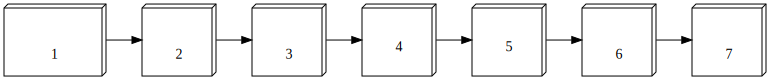

In [ ]:
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="定义一个机器\n 学习任务\n1"]
dataset[shape=box3d width=1 height=1 label="组织你的\n数据集\n2"]
eda[shape=box3d width=1 height=1 label="探索性\n数据分析\n3"]
preprocess[shape=box3d width=1 height=1 label="数据处理\n4"]
train[shape=box3d width=1 height=1 label="模型训练\n5"]
predict[shape=box3d width=1 height=1 label="模型评估\n和预测\n6"]
deploy[shape=box3d width=1 height=1 label="部署\n你的模型\n7"]
problem->dataset->eda->preprocess->train->predict->deploy''')

由于你刚刚了解了数据类型，即机器学习问题的两个基本类别，我们现在可以重新审视机器学习的工作流程，并将其专门应用于表格式建模。

1. ***定义一个ML任务：*** 

你在表格式数据方面的目标是要确定。

* 你要解决的问题是分类还是回归？

*需要哪些特征或独立变量来进行准确的预测？

* 你将选择什么可观察和可量化的性能指标？例如，在分类问题中，我们可以使用**准确率**作为衡量标准（我们在计算机视觉章节中学习了更多关于准确率的衡量标准），在回归问题中，我们可以使用**平均平方误差**作为衡量标准。

> 均方误差（MSE）显示了你在回归问题中预测的准确性。它是通过计算你的模型的预测和地面实况之间的差异，将其平方化，并在整个数据集上进行平均。它告诉你，回归线与你的数据集的一组点有多接近。

2. ***组织你的数据集：***。

对于许多表格式的机器学习项目来说，这是最繁琐和耗时的操作，不同的项目会有很大的不同。
由于我们的主要目的是学习机器学习算法如何帮助我们解决表格数据问题，我们将为你提供准备好的、已经清理过的数据集。所以现在我们省略了这一步，但当你开始在我们的高级训练营中进行个人机器学习项目时，肯定会给你答复。

此外，我们将把数据集分成训练、验证和测试集。我们还将为模型定义因变量和自变量，以及分类、数字和序数数据类型。

3. ***探索性数据分析：***。

了解你的数据集，看看所有的独立特征是如何相互关联并描述目标变量的，这总是好的。有些特征是完全相关的，它们不能帮助模型学习决定目标变量的任何有价值的关系，因此有些是多余的。有些特征没有互动性，因此被认为是噪音，有些可能包含太多的缺失值等等。在建立任何预测模型之前，了解自己的数据集的局限性是一个很好的开始，可以改善它。

我们将使用一个非常酷的工具，叫做**Pandas Profiling**，它为我们提供关于数据集的所有统计数据和有效的解释图来进行分析。你不需要再做传统的探索性数据分析，也不需要具备Python和Pandas的编码技能。

4. ***数据预处理：***

原始数据集可能有许多不完善的地方和多余的特征（记住在表格数据集中的特征代表什么），这些特征与预测目标变量无关，这是正常的。在某些情况下，它们甚至会对模型训练产生负面影响。因此，数据预处理技术，如特征选择、特征提取，将确保你的数据集得到完善，并准备好输入模型进行训练。


5. ***模型训练：*** 

这是另一个令人兴奋的部分，我们在unpackAI很自豪地在这周教你。传统上，表格建模是一个非常耗时的过程，需要对各种算法有深入的了解，并需要掌握如何应用和改进这些算法的技巧。如果你在谷歌上搜索机器学习算法，你会被现有算法的数量和用来解释它们的数学知识所淹没。好在机器学习已经发展成为一门工程学科，而不是像以前那样 "只有博士才知道自己在说什么 "的纯科学，所以它已经被自动化和简化。但仍然只有少数人知道：）。自动机器学习被称为AutoML，它使我们能够在一次运行中探索许多模型，根据性能（一个指标）挑选最好的模型，并进行微调，"所有这些只需点击几下"。是的，机器学习的实验很有趣 

6. ***模型评估和预测：***

为了进一步解释模型的性能，我们将采用解释技术。而且我们将再次使用AutoML功能来显示所有相关的模型评价图。了解模型的局限性是很重要的，这样才能对其在未见过的数据上的行为做出良好的判断。模型评估将是如此流畅和大量的视觉效果，所以你会喜欢它的

7. ***部署你的模型***

建立表格模型的最后一步是部署你的模型供公众访问，以便为终端用户展示其作为网络应用的性能。通常情况下，我们鼓励数据产品尽早在***控制环境中推***出，以测试它们的***概念和***数据漂移。 

>**数据漂移**。模型是在一定的输入分布上训练的，但这个分布随着时间的推移而改变。例如，一个模型可能已经学会了从历史数据中估计电力需求，但气候变化导致天气发生了前所未有的变化，所以模型的准确性下降了。

>**概念的漂移**。模型被训练为学习x->y的映射，但是x和y之间的统计关系发生了变化，所以同样的输入x现在需要一个不同的预测y。例如，一个根据平方英尺预测住房价格的模型将失去准确性，因为通货膨胀导致价格上涨。

*在整个产品周期中，持续的数据和概念漂移将长期保持对机器学习人才较高的需求。*

---
现在你已经看到了理论的基础，我们将深入到实践中。我们将研究分类问题，并详细了解代码如何与我们刚才描述的理论和工作流程相对应。

# 表格式建模中的分类问题

## 1. 定义一个机器学习问题，并提出一个解决方案

**设身处地地从一个电信公司的企业主的角度出发**。你的目标是通过提供最好的电话、互联网和流媒体服务为你的客户提供价值。出于这个原因，你给自己设定的目标是最大限度地提高客户的终身价值（CLV），这是衡量客户在与公司的整个关系中所产生的平均收入的标准。

为了实现这一目标，你要了解并预测客户是否以及为何会取消你的月度付款计划。换句话说，如果以及为什么一个客户会流失。

你收集了所有关于客户的信息，并打算利用随机森林来分析你的数据集。让我们来看看!

**目标**。Churn，有两个可能的值 "是 "和 "否"。

**样本**。一个样本显示一个客户的资料和信息。

**特征**。特征是每个客户的匿名信息，包括他们的特征和客户行为，如性别、付款方式、合同类型等。

*解决方案*是训练一个表格分类模型，该模型可以预测目标变量并识别对目标变量影响最大的特征。

## 2. 收集和构建你的数据集

在任何机器学习问题中，*直接观察你的数据是很重要的，以确保你了解数据的结构、格式、它拥有哪些类型的值，等等。我们将在本教材中直接访问具有`CSV`格式的数据集。如果你想自己下载数据集，你可以在这里做：https://www.kaggle.com/blastchar/telco-customer-churn。

> 我们用来访问这个数据集的平台叫做**Kaggle**。Kaggle允许用户在一个基于网络的数据科学环境中寻找和发布数据集，探索和建立模型。我们主要使用Kaggle来探索和寻找数据集。熟悉一下Kaggle吧!

在下面的代码单元中，我们使用Tabular Pandas访问我们的`csv`文件，这是一个数据操作和分析工具。我们通过添加一个`pd`来使用Pandas，并利用`read_csv`命令来打开我们的文件。通过`head`命令，我们只显示数据表格的前5行。

最后，我们将我们的数据集命名为`customerdata`。

In [ ]:
customerdata = pd.read_csv("https://raw.githubusercontent.com/unpackAI/unpackai/main/examples/datasets/Telco_Customer_Churn.csv")
customerdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 理解数据集

对于任何人工智能项目，了解你的数据是至关重要的。作为企业主，你应该非常熟悉如何理解、定义和聚集你的客户。为此，请潜心研究以下表格。

|Variable Name|Details|DataType|Possible Inputs|
|:---|:--- |:--- |:--- |
|customerID|Customer ID of each customer.| categorical |Each ID is unique|
|gender|Gender of the customer.|categorical |Female, Male|
|Senior Citizen|Indicates if the customer is 65 or older.| categorical |Yes, No|
|Partner|Indicates whether the customer has a partner or not.|categorical |Yes, No|
|Dependents|Indicates if the customer lives with any dependents. Dependents could be children, parents, grandparents, etc.| categorical |Yes, No|
|tenure|Indicates the total amount of months that the customer has been with the company.| numerical |continuous|
|PhoneService|Indicates if the customer subscribes to home phone service with the company.| categorical |Yes, No|
|MultipleLines|Indicates if the customer subscribes to multiple telephone lines with the company.| categorical |Yes, No|
|InternetService| Indicates if the customer subscribes to Internet service with the company. | categorical |No, DSL, Fiber Optic, Cable|
|OnlineSecurity|Indicates if the customer subscribes to an additional online security service provided by the company | categorical |Yes, No|
|OnlineBackup|Indicates if the customer subscribes to an additional online backup service provided by the company. | categorical |Yes, No|
|DeviceProtection|Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company.| categorical |Yes, No|
|TechSupport|Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times.| categorical |Yes, No|
|StreamingTV|Indicates if the customer uses their Internet service to stream television programing from a third party provider. The company does not charge an additional fee for this service.| categorical |Yes, No|
|StreamingMovies|Indicates if the customer uses their Internet service to stream movies from a third party provider. The company does not charge an additional fee for this service.| categorical |Yes, No|
|Contract|Indicates the customer’s current contract type.| categorical |Month-to-Month, One Year, Two Year|
|PaperlessBilling|Indicates if the customer has chosen paperless billing.| categorical |Yes, No|
|PaymentMethod|Indicates how the customer pays their bill.| categorical |Bank Withdrawal, Credit Card, Mailed Check|
|MonthlyCharges|Indicates the customer’s current total monthly charge for all their services from the company.| numerical |continous|
|TotalCharges|Indicates the customer’s total charges.| numerical |continous|
|**Churn**|**Yes = the customer left the company this quarter. No = the customer remained with the company.**|**categorical**|**Yes, No**|

整齐的数据集是组织中既定的数据管道流程的产物，它将原始数据从一个源头输送到一个目的地。最常用的数据管道方法之一是ETL（提取、转换、加载）。

<img src="https://blog.bismart.com/hubfs/herramientas%20ETL%20tipos%20y%20para%20qu%C3%A9%20sirven.jpg" alt="绘图" width="600"/>

> **如果没有适当组织的业务数据，你就无法建立任何预测模型，这些数据是由既定的日常蒸蒸日上的业务产生的。**

<img src="https://imgs.xkcd.com/comics/machine_learning.png" alt="drawing" width="300"/>

如果你在思考 "我可以将人工智能应用于我的业务数据吗？"那么我们建议你看一下 "数据科学需求层次"。

人工智能/ML占据了前两个层次，就在 "聚合/标签 "层次之上，在这个层次上，组织拥有所有的业务流程，可以开始为ML实验创建数据集。

<img src="https://miro.medium.com/max/1400/1*7IMev5xslc9FLxr9hHhpFw.png" alt="drawing" width="1000"/>

因此，你正确准备的数据集就像你的项目或业务的简历，你的目的是要实现自动化。

在将你的数据汇总到数据集后，通常下一步是进行探索性数据分析。


#### 使用Pandas分析的探索性数据分析（EDA）。

探索性数据分析（EDA）由一些技术组成，这些技术通常用于在进行任何正式建模之前获得关于你的数据集的可操作的见解。

<img src="http://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2012/07/images-mod1-big-picture-eda.gif" alt="绘图" width="400"/>


EDA帮助我们揭示数据集的基本结构，识别重要的变量，检测异常值和异常现象，并测试基本假设。通过EDA，我们可以识别相关的变量，它们的转换，以及与我们想要建立的模型有关的变量之间的互动。EDA还可以指出可能与建立所需模型有关的缺失数据。

分析一个数据集是一项繁忙的工作，需要大量的时间，但它是不可或缺的。我们将使用[Pandas Profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/)，它可以使EDA的整个过程自动化，并节省大量的时间。

Pandas Profiling的好处是，只要点击一下，你就能得到整个数据集的非常全面的报告。它可以生成一个结构整齐的HTML文件，包含图表和汇总数据的组合，如类型、唯一值、缺失值、量化统计、描述性统计、最频繁的值等。

只需几个命令，我们就可以生成一份内容丰富的报告。

In [ ]:
profile = ProfileReport(customerdata, title="Churn EDA")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

在简单介绍了报告之后，它可能会因为包含大量的统计术语和不熟悉的概念而让你措手不及。不理解每一个术语是完全可以的，也可以继续学习本课程书的数据预处理章节。尽管如果你坚持学习**TabularPandas**，你会得到一些数据科学知识的回报。如果你决定留下来，那么让我们先看看这个报告的内容，让它更容易消化。

1. **概述**

这一部分由三个标签组成。*概述*，*警告*，和*再现*。

概述*包括数据集统计和变量类型。这包括变量的数量、观察值的数量、缺失的单元格、重复的行等。

*警报*选项卡由任何类型的警告组成，这些警告涉及心数、与其他变量的相关性、缺失值、零值、变量的偏斜度以及其他许多方面。这些警告描述了数据集的不完善之处，这将导致模型在拟合数据时更加困难。

*复制*标签只是显示与报告生成本身有关的信息。这里没有什么对我们真正有价值的东西。

2. **变量**

报告的这一部分对数据集的所有特征进行了详细分析。主要有三种类型。*分类*，*布尔*和*数字*。

> *布尔*数据类型是一种具有两个可能值之一的数据类型（通常表示为真和假），旨在代表逻辑和布尔代数的两个真值。它是以乔治-布尔命名的，他在19世纪中期首次定义了一个逻辑代数系统。

对于数字数据类型的特征，你可以得到关于不同的值、缺失的值、最小-最大值、平均值和负值计数的信息。你还可以得到柱状图形式的小的表示值。

切换按钮可以扩展到统计学、直方图、普通值、极端值标签。

了解数据分布的优点。

1. 良好的实践
一旦你开始工作，了解你的数据是一个好的做法。许多算法，如线性回归，假定变量遵循一个特定的分布。
2. 跟踪分布随时间或在特殊事件/季节中的变化。模型部署后的数据分布变化导致了数据漂移


类别选项卡显示直方图，有时也显示特征的值计数的饼图。表格包含值、计数和百分比频率。

在以表格和直方图的方式展示数据方面，单词和字符选项卡与类别选项卡的工作相同，但它也可以深入到小写字母、大写字母、标点符号、特殊字符的类别计数中!

3. **互动**

我们可以研究数字变量之间的散点图。

每一对特征都会得到一个它们之间相互作用的散点图表示。这些图对于识别数据中的一些趋势和重要的关联性非常有帮助。


4. **关联** 

相关矩阵是用来描述变量之间相互协调运动的程度。在pandas剖析报告中，你可以访问5种类型的相关系数。Pearson's r、Spearman's ρ、Kendall's τ、Phik（φk）和Cramér's V（φc）。通过点击 "切换相关描述"，你可以得到每一个矩阵的描述。

交互矩阵和相关矩阵都被使用。

* 总结大量的数据，目的是为了看到模式。在我们的数据集中，可观察到的模式是所有的变量都彼此高度相关。
* 在检查其他分析时作为一种诊断。例如，对于线性回归，大量的相关性表明，线性回归的估计值将是不可靠的。

5. **缺失的价值**

生成的报告还包含了数据集中呈现的缺失值的可视化。你会得到两种类型的图。计数图和矩阵图。计数图是一个基本的条形图，X轴为列名，条形图的高度代表存在值的数量。

6. **样本**
这一部分显示数据集的前10行和最后10行。

## 数据准备

### 验证集和测试集

模型的目标是对数据进行预测。但模型的训练过程从根本上说是愚蠢的。如果我们用我们所有的数据训练一个模型，然后用同样的数据来评估这个模型，我们就无法知道我们的模型在它没有见过的数据上能有多好的表现。如果没有这个非常有价值的信息来指导我们训练模型，那么它很有可能变得擅长对该数据进行预测，但在新数据上的表现却很差。

为了避免这种情况，在以前的课程书中，我们同时介绍了*训练集*（我们的模型在训练中看到的）和*验证集*（仅用于评估）。这让我们可以测试模型从训练数据中学习到的经验是否可以推广到新数据，即验证数据。记住，我们通过观察验证损失和准确率来评估模型的性能，这两个指标只在验证集上测量。

对这种情况的一种理解是，从某种意义上说，我们不希望我们的模型通过 "作弊 "获得好的结果。如果它对一个数据项做出了准确的预测，那应该是因为它已经学会了那种项目的特征，而不是因为模型已经被*实际看到的那个特定项目*所塑造。

分离验证数据意味着我们的模型在训练中从未见过它，所以完全没有受到它的影响，这不是任何形式的欺骗。对吗？

事实上，不一定。这种情况更加微妙。这是因为在现实场景中，我们很少只通过训练一次参数来建立一个模型。相反，我们可能会通过各种建模选择来探索一个模型的许多版本，这些选择涉及网络结构、学习率、数据增强策略以及我们将在接下来的章节中讨论的其他因素。其中许多选择可以被描述为*超参数*的选择。这个词反映了它们是关于参数的参数，因为它们是支配权重参数意义的更高层次的选择。

问题是，尽管普通的训练过程在学习权重参数值时只关注训练数据的预测，但我们的情况并非如此。作为建模者，当我们决定探索新的超参数值时，我们是通过观察验证数据的预测来评估模型的！因此，模型的后续版本是，当我们决定探索新的超参数值时，我们是通过观察验证数据的预测来评估的。因此，模型的后续版本是由我们看过验证数据后间接形成的。就像自动训练过程有可能对训练数据进行过度拟合一样，我们也有可能通过人为的试错和探索对验证数据进行过度拟合。

解决这个难题的办法是引入另一层更高度保留的数据：测试集。就像我们在训练过程中保留验证数据一样，我们甚至必须对自己保留测试集的数据。它不能被用来改进模型；它只能在我们工作的最后阶段用来评估模型。实际上，我们定义了一个切割数据的层次，基于我们想从训练和建模过程中完全隐藏它的程度：训练数据完全暴露，验证数据较少暴露，而测试数据则完全隐藏。

有两层 "保留数据"--验证集和测试集，其中一层代表你几乎对自己隐藏的数据--可能看起来有点极端。但这往往是必要的，因为模型往往倾向于以最简单的方式进行良好的预测（记忆），而我们作为易变的人类往往倾向于在模型的表现上欺骗自己。测试集的纪律帮助我们在智力上保持诚实。这并不意味着我们总是需要一个单独的测试集--如果你的数据很少，你可能只需要一个验证集，但一般来说，如果可能的话，最好使用一个测试集。

如果你打算雇用第三方代表你进行建模工作，这种纪律也是至关重要的。第三方可能不能准确地理解你的需求，或者他们的动机甚至可能鼓励他们误解你的需求。一个好的测试集可以大大降低这些风险，让你评估他们的工作是否解决了你的实际问题。

直截了当地说，如果你是组织中的高级决策者（或者你在为高级决策者提供建议），最重要的收获是：如果你确保你真正了解什么是测试和验证集，以及为什么它们很重要，你将避免组织决定使用人工智能时的最大失败来源。例如，如果你正在考虑引入一个外部供应商或服务，确保你持有一些供应商永远不会看到的测试数据。然后你在你的测试数据上检查他们的模型，使用一个你根据实际情况选择的指标，并决定什么水平的性能是足够的。(你自己尝试一下简单的基线也是一个好主意，这样你就知道一个真正简单的模型能达到什么效果。通常情况下，你的简单模型和外部 "专家 "制作的模型表现得一样好！)

### 将数据集拆分为训练集和测试集

我们将只保留一小部分（5%）数据集作为测试集，用于最终的模型测试。

In [ ]:
data = customerdata.sample(frac=0.95, random_state=786)
data_unseen = customerdata.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (949, 21)
Unseen Data For Predictions: (50, 21)


## 自动化机器学习

**2021年**关于机器学习的最大神话。

 "机器学习太难了..."

<img src="https://www.red-gate.com/simple-talk/wp-content/uploads/2021/01/word-image-37.png" alt="drawing" width="500"/>

上面的推文已经很过时了，因为2018年的机器学习还没有像现在这样成熟。[麦肯锡的报告](https://www.mckinsey.com/business-functions/mckinsey-analytics/our-insights/rethinking-ai-talent-strategy-as-automated-machine-learning-comes-of-age)显示了AutoML对整个数据科学工作流程的影响，因为它导致重新思考组织如何设计和执行其AI/ML战略。

<img src="https://www.mckinsey.com/~/media/mckinsey/business%20functions/mckinsey%20analytics/our%20insights/rethinking%20ai%20talent%20strategy%20as%20automated%20machine%20learning%20comes%20of%20age/svg-rethinking-ai-strategy-exhibit-1.svgz" alt="drawing" width="600"/>

AutoML消除了决策者在组织中开始人工智能实验和实施的最大障碍----> *对编码技能和稀缺的人工智能人才的依赖*。  

在接下来的章节中，你将看到建立一个表格模型是多么容易。为此，我们将使用PyCaret。

### AutoML与Pycaret

[PyCaret](https://pycaret.org/)是一个开源的、低代码的Python机器学习库，它允许你在几分钟内从准备数据到在你选择的笔记本环境中部署模型。

> 使用PyCaret就像使用其他AutoML工具一样，需要对机器学习工作流程、数据集结构、EDA和模型性能评估有良好的理解。

### PyCaret设置

我们需要告诉PyCaret，我们将为电信流失率数据集建立一个分类模型。

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


`setup()`创建数据转换管道，为建模准备数据。它需要两个强制参数：一个pandas数据框架和目标列的名称。所有其他参数（如`session_id=123`）是可选的，用于定制预处理管道。

当`setup()`被执行时，PyCaret的推理算法将根据某些属性自动推断所有特征的数据类型。数据类型应该被正确推断出来，但情况并非总是如此。为了说明这一点，PyCaret在执行`setup()`后会显示一个包含特征及其推断的数据类型的表格。如果所有的数据类型都被正确识别，可以按 "回车 "键继续，也可以输入 "退出 "来结束实验。确保数据类型的正确性在PyCaret中是非常重要的，因为它根据识别的数据类型自动执行一些预处理任务。

In [ ]:
data_prep = setup(data, target = 'Churn', session_id=123, fix_imbalance=True, feature_selection = True, remove_multicollinearity = True)


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:15:13
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
customerID,Categorical
gender,Categorical
SeniorCitizen,Categorical
Partner,Categorical
Dependents,Categorical
tenure,Numeric
PhoneService,Categorical
MultipleLines,Categorical
InternetService,Categorical
OnlineSecurity,Categorical


一旦`setup()`被成功执行，它就会打印出信息网格，其中包含几个重要信息。大多数信息与执行`setup()`时构建的预处理管道有关。这些特征中的大部分不在本课程书的范围内，但是在这个阶段有几个重要的东西需要注意。

**session_id**：一个伪随机数，确保你的机器学习实验的可重复性。如果没有传递session_id，就会自动生成一个随机数，分配给所有函数。在这个实验中，session_id被设置为123，以便以后可以重现。

**目标类型**：二进制或多类。目标类型被自动检测并显示。对于二进制或多类问题，实验的执行方式没有区别。所有的功能都是相同的。

**标签编码**：当目标变量是字符串类型（即 "是 "或 "否"）而不是1或0时，它会自动将标签编码为1和0，并显示映射（0：否，1：是）供参考。

**原始数据**：显示数据集的原始形状。在这个实验中（949，21）意味着949个样本和21个特征，包括目标列。

**缺失值**：当原始数据中存在缺失值时，将显示为真。在这个实验中，数据集中没有缺失值。

**数字特征**：推断出的数字特征的数量。在这个数据集中，21个特征中的2个被推断为数字。

**分类特征**：被推断为分类的特征数量。在这个数据集中，21个特征中的19个被推断为分类的。

**转换后的训练集**：显示了转换后的训练集的形状。请注意，转换后的训练集的原始形状（949，21）被转换为（664，34），由于分类编码，特征的数量从21个增加到34个。

**转换后的测试**（*PyCaret称验证为测试集*）：显示转换后的测试/保留集的形状。test/hold-out集有285个样本。这个分割是基于70/30的默认值，可以使用setup中的train_size参数来改变。

注意到一些必须进行建模的任务是如何被自动处理的，比如缺失值的归纳（在这种情况下，训练数据中没有缺失值，但我们仍然需要对未见过的数据进行归纳），分类编码等。`setup()`中的大多数参数是可选的，用于定制预处理管道。这些参数不在本教程的范围内，但随着你进入中级和专家级的学习，我们将更详细地介绍这些参数。

## 比较所有模型

比较所有的模型来评估性能是设置完成后建议的建模起点（除非你确切地知道你需要什么样的模型，这往往不是情况）。这个函数训练了模型库中的所有模型，并使用度量衡给它们打分。输出打印出一个分数网格，显示平均准确率、AUC、召回率、精确率、F1、Kappa和MCC（默认为10），以及训练时间。

In [ ]:
best_model = compare_models()

## 创建一个模型

In [ ]:
linear_regression = create_model('lr')

请注意，所有模型的平均分数与`compare_models()`中打印的分数一致。这是因为在`compare_models()`分数网格中打印的指标是所有**交叉验证折叠的平均分数。

与`compare_models()`类似，如果你想将折叠参数从默认值10改为不同的值，那么你可以使用折叠参数。例如：`create_model('lr', fold = 5)`将创建一个使用5折**分层交叉验证的线性回归分类器。



### 我们为什么要使用交叉验证？

正如你所记得的，我们把数据分成了训练集和验证/测试集。训练集是用来训练模型的，验证/测试集是用来在它从未见过的数据上验证它。经典的方法是做一个简单的80%-20%的分割，有时也有不同的值，如70%-30%或90%-10%。在交叉验证中，我们要做不止一次的分割。我们可以做3、5、10或任何K数的拆分。这些分割称为折叠，我们可以用很多策略来创建这些折叠。

<img src="https://miro.medium.com/max/1052/1*55TfJMq5AkMKDg9VUa7ktA.jpeg" alt="drawing" width="600"/>


简而言之，**交叉验证**确保了你的机器学习模型的稳定性。把你的数据集分成训练集和验证集是不够的，因为你可能会有风险，最终这些数据集之间的数据分布和统计数据会有所不同。***你需要某种保证，你的模型已经从数据中得到了大部分的模式，而且它没有发现太多的噪音，或者换句话说，它的偏差和方差很低***。

这篇文章[5个为什么你应该在你的数据科学项目中使用交叉验证](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79)漂亮地总结了为什么你应该使用交叉验证方法的好理由，特别是如果你有一个有限的和不平衡的数据集，这是你在现实生活项目中常见的情况。

## 微调一个模型

当使用`create_model()`函数创建一个模型时，它使用默认的超参数来训练该模型。为了调整超参数，需要使用`tune_model()`函数。这个函数使用随机网格搜索在预先定义的搜索空间上自动调整模型的超参数。这是微调模型的一个很好的方法，我们不需要去研究其中的细节。输出会打印出一个分数网格，显示最佳模型的准确率、AUC、召回率、精确率、F1、Kappa和MCC。

In [ ]:
tuned_lr = tune_model(linear_regression)

In [ ]:
print(tuned_lr)

默认情况下，`tune_model`优化准确率，但这可以通过优化参数改变。例如：`tune_model(dt, optimize = 'AUC')`将搜索线性回归分类器的超参数，从而获得最高的AUC，而不是准确率。为了让你更容易学习，我们使用了默认指标Accuracy。一般来说，当数据集是不平衡的，也就是我们的情况*（"不 "是743个，"是 "是256个，比例是2.9）*，准确率不是一个好的考虑指标。选择正确的指标来评估分类器背后的方法超出了本教材的范围，但是如果你想了解更多，你可以[点击这里](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b) 阅读一篇关于如何选择正确评估指标的文章。

在最终确定用于生产的最佳模型时，仅有指标并不是你应该考虑的唯一标准。其他需要考虑的因素包括训练时间、kfolds的标准偏差等。在这个阶段，我们不会为生产用机器学习工程的所有错综复杂的细节过多地打扰自己。

## 绘制一个模型

在模型最终确定之前，`plot_model()`函数可以用来分析不同方面的表现，如AUC、混淆矩阵、决策边界等。这个函数接收一个训练好的模型对象，并返回一个基于测试集的图。

有15种不同的图，我们将在下面探讨其中的几个。

### AUC Plot

In [ ]:
plot_model(tuned_lr , plot = 'auc')

### Precision-Recall Curve

In [ ]:
plot_model(tuned_lr , plot = 'pr')

### Feature Importance Plot

In [ ]:
plot_model(tuned_lr, plot='feature')

### Confusion Matrix

In [ ]:
plot_model(tuned_lr, plot = 'confusion_matrix')

另一种分析模型性能的方法是使用`evaluate_model()`函数，该函数显示一个用户界面，用于给定模型的所有可用图。它在内部使用`plot_model()`函数。

In [ ]:
evaluate_model(tuned_lr)

## 预测测试/保留样本

在最终确定模型之前，最好是通过预测测试/预留集和审查评估指标来进行最后的检查。在Pycaret设置阶段，我们把30%（285个样本）的数据作为测试/保留集。我们在上面看到的所有评估指标都是基于训练集（70%）的交叉验证结果。现在，使用存储在 "tuned_lr "变量中的最终训练好的模型，我们将对预留样本进行预测，并评估指标，看它们是否与交叉验证结果有实质性区别。

In [ ]:
predict_model(tuned_lr);

测试/保留集的准确度为0.7404，而tuned_rf交叉验证结果的准确度为0.7590。这并不是一个显著的差异。如果测试/保留和交叉验证结果之间有很大的差异，那么这通常表明过度拟合，但也可能是由于其他一些因素，需要进一步调查。在这种情况下，我们将继续敲定模型，并在未见过的数据上进行预测（我们一开始就把5%的数据分开，从未接触过PyCaret）。

## 最终确定部署的模型

模型的最终确定是实验的最后一步。PyCaret中正常的机器学习工作流程从`setup()`开始，然后用`compare_models()`比较所有的模型，并筛选出几个候选模型（基于感兴趣的指标），以执行一些建模技术，如超参数调整、合奏、堆叠等。这个工作流程将最终引导你找到最佳模型，用于对新的和未见过的数据进行预测。`finalize_model()`函数将模型拟合到完整的数据集上，包括测试/保留样本（本例中为30%）。这个函数的目的是在将模型部署到生产中之前在完整的数据集上训练模型。

In [ ]:
final_lr = finalize_model(tuned_lr)

In [ ]:
#Final linear regression model parameters for deployment
print(final_lr)

注意事项。最后要注意的是。一旦使用`finalize_model()`确定了模型，整个数据集包括测试/搁置集都被用于训练。因此，如果在使用`finalize_model()`后，将模型用于预测暂不使用的数据集，打印出来的信息网格将具有误导性，因为你正试图在用于建模的相同数据上进行预测。为了证明这一点，我们将在`predict_model()`下使用`final_lr`来比较信息网格和测试集上的预测结果。

In [ ]:
predict_model(final_lr);

注意到 "final_lr "的AUC是如何从0.8792上升到0.9013的，尽管模型是一样的。这是因为 "final_lr "变量已经在完整的数据集上进行了训练，包括测试/保留集。

## 对未见过的数据进行预测

`predict_model()`函数也被用来对未见过的数据集进行预测。与之前的预测步骤唯一不同的是，这次我们将传递data_unseen参数。data_unseen包含原始数据集的5%（50个样本），这些数据集从未暴露给PyCaret。

In [ ]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

标签和分数列被添加到`data_unseen`集合中。
**Label**是预测结果，**Score**是预测结果的概率。请注意，预测的结果被串联到原始数据集上，而所有的转换都是在后台自动进行的。你也可以检查这方面的指标，因为你有实际的目标列默认可用。要做到这一点，我们将使用`pycaret.utils`模块。请看下面的例子。

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Churn'], unseen_predictions['Label'], metric = 'Accuracy')


### 保存模型

现在我们已经完成了实验，最终确定了 "tuned_lr "模型，它现在被存储在 "final_lr "变量中。我们还使用存储在`final_lr`中的模型来预测`data_unseen`。这样我们的实验就结束了，但还有一个问题要问。当你有更多的新数据需要预测时会发生什么？你必须再次进行整个实验吗？答案是否定的，PyCaret的内置函数`save_model()`允许你将模型和整个转换管道一起保存起来，以便以后使用。

In [ ]:
save_model(final_lr,'Final LR Model 21Nov2021')

(提示：在保存模型时，在文件名中使用日期总是好的，这对版本控制有好处。)

### 加载已保存的模型

要想在未来的某一天在相同或其他环境下加载已保存的模型，我们可以使用PyCaret的`load_model()`函数，然后轻松地将保存的模型应用于新的未见过的数据进行预测。

In [ ]:
saved_final_lr = load_model('/content/Final LR Model 21Nov2021')

一旦模型被加载到环境中，你可以简单地使用相同的`predict_model()`函数对任何新数据进行预测。下面我们应用加载的模型来预测我们之前使用的相同的data_unseen。

In [ ]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)

In [ ]:
new_prediction.head()

注意，`unseen_prediction`和`new_prediction`的结果是相同的。

In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction['Churn'], new_prediction['Label'], metric = 'Accuracy')

### 把模型放到现实生活中去。

我们现在可以预测一个客户是否会流失。但是，作为企业主，我们怎样才能利用这一点呢？

比方说，我们有一个叫威尔的客户。威尔成为我们的客户已经有6个月了，但是，我们的模型预测他将会流失。现在有了这个洞察力，我们应该尽一切努力保持良好的客户关系，向他发送电子邮件、促销活动或客户套餐，以防止他流失。

而这也可以在规模上展开。一旦公司能够对他们的客户做出可靠的预测，他们就可以做出商业决策，这将增加收入，并且是人工智能驱动的。

# 你的可交付成果，你在实践中应用理论的时间。

祝贺你读完了这本笔记本，如果你对一些理论感到困惑，没有完全理解这里所讲的内容，也不用担心，因为你的实际学习是从这里开始。

理想的阅读时间是在复习课之前，这样你就有一点时间来思考学习材料，找出阅读中最困惑和最难的内容，并在问答课上与导师和助教讨论。因此，复习课是为了让你弥补你目前对材料理解的差距。

对于你的成果，你将不得不在一个单独的工作簿上工作。